# Assignment 1
## Graphs and Networks
### Gerardo Durán Martín | MTH750P

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

%config InlineBackend.figure_format = "retina"

### 1 (Graphs and Networks)
- (a) Think of five different systems you can describe in terms of complex networks. State what the nodes and the connections of the network represent in each case. The two who will come up with the two most original examples will get as a prize. Explain an importance of the networks you choose.

```
1. The behvaiour of the GME stock in terms of the participants: the nodes are the market participants and the edges are nodes representing whether two nodes (market participants) have made a transaction. The importance of modeling this network is to know whether a "short-ladder" attack is actually begin done on GME. Some people on the internet especulate that hedge funds are trying to syntetically drive the price of the GME to $0. If this is true, then we should see small "clusters" that make big and frequent transactions among them, and another big cluster of nodes that remain mostly static or buy GME shares, but do not sell them. The small clusters would represent the hedge funds (small with big purchasing power), and the big cluster the "retail" investors.

2. In the book Sapiens by Yuval Noah Harari, the author argues that cultures are not static but are in constant motion. We could model cultures as a complex system via a weighted directed graph. Each node represents a culture and every edge is a weighted value of the impact of a culture in another. Modeling cultures as a complex system can makes us model how a culture "is born" or when they cease to exist.

3. The evolution of the spread of a disease: the nodes are the people and the (directed) edges represent whether person n_1 infected n_2.

4. n-degrees of Elon Musk: the nodes are entrepreneurs and the edges are whether two entrepreneurs know each other. The goal would be to find the mean value n of connections to have a connection with Elon Musk.


5. Model the evolution of music: nodes are artists and the edges denote whether two artists have collaborated. With this network, we can try to model the evolution of music over time. We can see how new genres are created by merging with others, while some other genres get away from an original genre.
```

- (b) With the help of your colleagues, we will construct and draw the network of friendships in your “Graphs and Networks” class as it is now in Week 1. Which kind of network do you get?

```
We get a directed graph: the nodes represent the students and edges whether a given student says to be friend of another student.
```

### 2 (The perfect party)

- (a) Imagine to have organised a party with $N = 5$ people. Some of the people at the party know already each other, so that we focus on the party friendship network. In particular, two of them have one friend each at the party, two of them have two friends each, and one has got three friends. Is this network possible? Why? Hint: Prove that in any network the number of nodes with odd number of connections must be even.

Let $G = \{\mathcal{N}, \mathcal{L}\}$ be an undirected graph. Denote $\text{deg}(n)$ the number of connections that node $n$ has. Since our graph has $|\mathcal L|$ edges, it follows that $\sum_{n \in \mathcal N} \text{deg}(n) = 2|\mathcal L|$. Furthermore, denote $\mathcal N_1$ the set of of even degree nodes, i.e., $\forall n\in\mathcal N_1 \implies \text{deg}(n) \mod 2 \equiv 0$, and $\mathcal N_2$ the set of odd degree nodes, i.e., $\forall n\in\mathcal N_2 \implies \text{deg}(n) \mod 2 \equiv 1$. We have

$$
    2|\mathcal L| = \sum_{n \in \mathcal N_1} \text{deg}(n) + \sum_{n \in \mathcal N_2} \text{deg}(n)
$$

For $\sum_{n \in \mathcal N_1} \text{deg}(n)$ we know that this sum must be even (we are summing even numbers), whereas $ \sum_{n \in \mathcal N_2} \text{deg}(n)$ is a sum of odd numbers. Since the sum of all degrees is even, it follows that the total number of nodes of odd connection is even.

---

In our example, we have 3 friends with an odd number of degrees each. Therefore, the network is not possible.

- (b) Is it possible to have a party at which no two people have the same number of friends? Can you support your answer by a mathematical proof?

Consider a party with $N$ people and $\mathcal L$ friendship links. To have a party in which no two people have the same number of friends is to consider a party in which one member has no connection, another has one friend, another has two friends, and so on, i.e., the degrees can be written as $0, 1, \ldots, N - 1$, where $0$ is the degree of a person with no friends and $N-1$ is the degree of a person who is friend with everyone at the party. But this is a contradiction since a person cannot be friend with everyone and at the same time exist a person with  no friends.

Therefore, it is no possible to have a party in which no two people have the same number of friends.

### 3 (Drawing networks)

Download the data corresponding to Elisa’s kindergarten. Build a network and find the node that has the largest (total) number of connections.

In [2]:
G = nx.read_edgelist("../data/kindergarten/kindergarten.net", create_using=nx.DiGraph(), nodetype = int)
with open("../data/kindergarten/kindergarten_name_map") as f:
    map_nodes = f.read()

map_nodes = {int(v.split(" ")[0]): v.split(" ")[1] for v in  map_nodes.split("\n") if len(v) > 1}
G = nx.relabel.relabel_nodes(G, map_nodes)

G.nodes

NodeView(('Agnese', 'Chiara', 'Elisa', 'Matteo', 'Giuliana', 'Gabriella', 'Alessandra', 'Nicoletta', 'Martina', 'Elvis', 'Emanuele', 'Lorenzo', 'Pierfrancesco', 'Gianluca', 'Simone', 'Ludovica'))

In [3]:
num_incoming_friends = {}
for student in G.nodes():
    num_incoming_friends[student] = len(G.in_edges(student))

In [4]:
num_outgoing_friends = {}
for student in G.nodes():
    num_outgoing_friends[student] = len(G.out_edges(student))

To obtain the total number of connections, we sum the number of times student $x$ says to have friends plus the number of times other students have said to be friends of $x$.

In [5]:
friends_df = pd.DataFrame({"in_friends": num_incoming_friends,
              "out_friends": num_outgoing_friends})
friends_df

,in_friends,out_friends
Agnese,7,5
Chiara,4,4
Elisa,5,4
Matteo,7,4
Giuliana,4,6
Gabriella,5,4
Alessandra,3,6
Nicoletta,4,3
Martina,4,5
Elvis,2,2


In [6]:
total_connections = friends_df.sum(axis=1)
total_connections.idxmax(), total_connections.max()

('Agnese', 12)

We note that "Agnese" is the node with most number of connections

Consider the ”Graphs & Networks” friendship network. Could you build a picture of it? Can you visually identify students with the largest (total) number of connections? Can you confirm this by running a calculation?

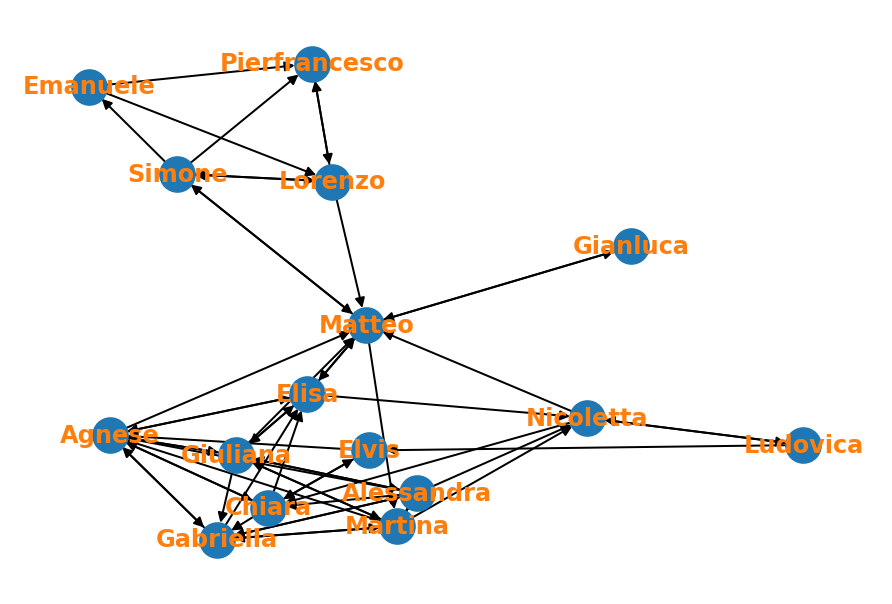

In [7]:
np.random.seed(31415)
nx.draw(G, with_labels=True, font_weight='bold', font_color="tab:orange")

In [8]:
total_connections.sort_values(ascending=False)

Agnese           12
Matteo           11
Giuliana         10
Martina           9
Alessandra        9
Gabriella         9
Elisa             9
Chiara            8
Nicoletta         7
Simone            6
Lorenzo           6
Pierfrancesco     4
Elvis             4
Ludovica          3
Emanuele          3
Gianluca          2
dtype: int64

### References

* https://networkx.org/documentation/stable/tutorial.html
* https://stackoverflow.com/questions/41107294/reading-text-file-of-graph-data-using-networkx